# Ejercicio 2.4

Demostrar la dificultad de los métodos sample-average para resolver problemas no estacionarios.

Usar una versión del 10-armed testbed donde todos los $q(a)$ comienzan siendo iguales y luego evolucionan tomando caminos aleatorios independientes.

Graficar los resultados para un agente que implemnte sample-average incremental usando $\alpha = \frac{1}{k}$. y otro agente que utilice una constante $\alpha = 0.1$. Usar $\epsilon = 0.1$ y correr los pasos necesarios para mostrar que el segundo agente, eventualmente, supera al primero

In [15]:
from tabular_solutions import armed_bandit
from tabular_solutions.experiments import n_armed_bandit_experiment
import numpy as np

In [16]:
def execute_task(agent_class, env_class, steps, agent_eps=0, agent_q1=0):
    n = 10
    mean_rewards = np.zeros(n)
    std_rewards = np.ones(n)
    rewards = np.random.normal(mean_rewards, std_rewards)
    noise = 1

    env = env_class(n, rewards=rewards, noise=noise, steps_to_change=1)
    agent = agent_class(env, epsilon=agent_eps, initial_q_values=agent_q1)

    rewards_by_step = np.zeros(steps)
    optimal_action_chosen_by_step = np.zeros(steps)

    for step in range(steps):
        optimal_action = np.argmax(env.rewards)
        agent.task(1)
        rewards_by_step[step] = agent.rewards[-1]
        optimal_action_chosen_by_step[step] = env.last_action == optimal_action

    return rewards_by_step, optimal_action_chosen_by_step

In [17]:
agents_epsilons = [0.1]
steps = 2000
tasks_qty = 2000

params = {
    'agent_class': armed_bandit.IncrementalAgent,
    'env_class': armed_bandit.NArmedBanditRandomWalkRewardsUpdate,
    'steps': steps,
    'agent_eps': 0.1,
    'agent_q1': 0
}

agents_avg_reward_by_step, agent_optimal_action_chosen_by_step = (
    n_armed_bandit_experiment(
        agents_epsilons, steps, tasks_qty, execute_task_func=execute_task, execute_task_params=params
    )
)

Experiment took 4.38 minutes


In [18]:
agents_epsilons = [0.1]
steps = 2000
tasks_qty = 2000

params = {
    'agent_class': armed_bandit.NonStationaryIncrementalAgent,
    'env_class': armed_bandit.NArmedBanditRandomWalkRewardsUpdate,
    'steps': steps,
    'agent_eps': 0.1,
    'agent_q1': 0
}

non_stationary_agents_avg_reward_by_step, non_stationary_agent_optimal_action_chosen_by_step = (
    n_armed_bandit_experiment(
        agents_epsilons, steps, tasks_qty, execute_task_func=execute_task, execute_task_params=params
    )
)

Experiment took 3.57 minutes


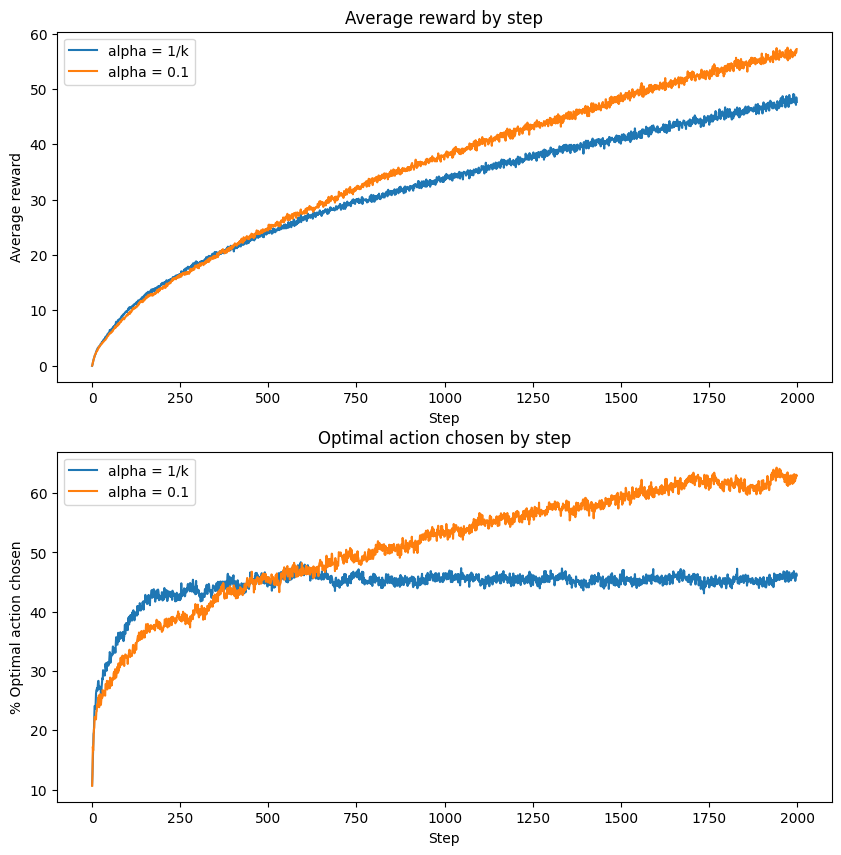

In [19]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

label_0 = f'alpha = 1/k'
label_1 = f'alpha = 0.1'

ax[0].plot(agents_avg_reward_by_step[0], label=label_0)
ax[0].plot(non_stationary_agents_avg_reward_by_step[0], label=label_1)

ax[1].plot(agent_optimal_action_chosen_by_step[0] * 100, label=label_0)
ax[1].plot(non_stationary_agent_optimal_action_chosen_by_step[0] * 100, label=label_1)


ax[0].set_title('Average reward by step')
ax[0].set_xlabel('Step')
ax[0].set_ylabel('Average reward')
ax[0].legend()

ax[1].set_title('Optimal action chosen by step')
ax[1].set_xlabel('Step')
ax[1].set_ylabel('% Optimal action chosen')
ax[1].legend()

plt.show()

# Resultados

A partir del paso 500 el agente con $\alpha = 0.1$ supera al agente con $\alpha = \frac{1}{k}$